Version: 02.14.2023

# Lab 3.3: Encoding and Vectorizing Text

In this lab, you will examine the bag-of-words (BOW) method to convert text data into numerical values. These numerical values will be used later for predictions with machine learning (ML) algorithms. You will then use the Word2Vec algorithm that's implemented by the built-in Amazon SageMaker algorithm BlazingText, which generates vectors from the text.

To convert text data to vectors of numbers, a vocabulary of known words (_tokens_) is extracted from the text. Then, the occurence of words is scored. Finally, the resulting numerical values are saved in vocabulary-long vectors. There are a few versions of BOW, which correspond to different methods of scoring words. In this lab, you will use the scikit-learn (sklearn) library to calculate the numerical values for BOW.

## Lab steps

To complete this lab, you will follow these steps:

1. [Working with binary](#1.-Working-with-binary)
2. [Working with word counts](#2.-Working-with-word-counts)
3. [Working with term frequency (TF)](#3.-Working-with-term-frequency-(TF))
4. [Working with term frequency–inverse document frequency (TF-IDF)](#4.-Working-with-term-frequency-inverse-document-frequency-(TF-IDF))
5. [Using Word2vec with BlazingText](#5.-Using-Word2vec-with-BlazingText) 

## Submitting your work

1. In the lab console, choose **Submit** to record your progress and when prompted, choose **Yes**.

1. If the results don't display after a couple of minutes, return to the top of these instructions and choose **Grades**.

     **Tip**: You can submit your work multiple times. After you change your work, choose **Submit** again. Your last submission is what will be recorded for this lab.

1. To find detailed feedback on your work, choose **Details** followed by **View Submission Report**.    

In [1]:
#Upgrade dependencies
!pip install --upgrade pip
!pip install --upgrade boto3
!pip install --upgrade scikit-learn
!pip install --upgrade sagemaker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 36.3 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.31.76
    Uninstalling botocore-1.31.76:
      Successfully uninstalled botocore-1.31.76
  Attempting uninstall: boto3
    Found existing installation: boto3 1.28.76
    Uninstalling boto3-1.28.76:
      Successfully uninstalled boto3-1.28.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.29.76 requires botocore==1.31.76, but you have botocore 1.31.82 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 917.0/917.0 kB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sagemaker: filename=sagemaker-2.197.0-py2.py3-none-any.whl size=1223347 sha256=9f09096be59d313f4b

## 1. Working with binary
([Go to top](#Lab-3.3:-Encoding-and-Vectorizing-Text))

In this task, you start by calculating the first type of BOW, which records whether the word is in the sentence. You will also go over some useful features of the scikit-learn vectorizers.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

# Initialize the count vectorizer with the parameter: binary=True
binary_vectorizer = CountVectorizer(binary=True)

# fit_transform() function fits the text data and gets the binary BoW vectors
x = binary_vectorizer.fit_transform(sentences)

As the vocabulary size grows, the BOW vectors also become large in size. They are usually made of many zeros and very few non-zero values. scikit-learn stores these vectors in a compressed form. If you want to use them as Numpy arrays, you can call the __toarray()__ function. The following code cell shows the binary BOW features. Each row corresponds to a single document.

In [3]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

You can also look at the vocabulary by using the __vocabulary___ attribute. It returns a dictionary with each word as a key and the index as the value. Notice that they are ordered alphabetically.

In [4]:
binary_vectorizer.vocabulary_

{'this': 8,
 'document': 1,
 'is': 3,
 'the': 6,
 'first': 2,
 'second': 5,
 'and': 0,
 'third': 7,
 'one': 4}

You can get similar information with the __get_feature_names()__ function. The position of the terms in the **.get_feature_names()** output correspond to the column position of the elements in the BOW matrix.

In [5]:
print(binary_vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


You might wonder how can you calculate BOW for a new text. You can do so by using the __transform()__ function. You can see that this function doesn't change the vocabulary. In this case, new words are skipped.

In [6]:
new_sentence = ["This is the new sentence"]

new_vectors = binary_vectorizer.transform(new_sentence)

In [7]:
new_vectors.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1]])

## 2. Working with word counts
([Go to top](#Lab-3.3:-Encoding-and-Vectorizing-Text))

Word counts can be calculated by using the same __CountVectorizer()__ function _without_ the __binary__ parameter.



In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["This document is the first document", "This document is the second document", "and this is the third one"]

# Initialize the count vectorizer
count_vectorizer = CountVectorizer()

xc = count_vectorizer.fit_transform(sentences)

xc.toarray()

array([[0, 2, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1]])

You can use the __transform()__ function to calculate BoW for a new text without changing the vocaulary as with the binary scenario.

In [9]:
new_sentence = ["This is the new sentence"]
new_vectors = count_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0, 0, 0, 1, 0, 0, 1, 0, 1]])

## 3. Working with term frequency (TF)
([Go to top](#Lab-3.3:-Encoding-and-Vectorizing-Text))

Term frequency (TF) vectors show how important words are to documents. They are computed by using:

$$tf(term, document) = \frac{number\, of\, times\, the\, term\, occurs\, in\, the\, document}{total\, number\, of\, terms\, in\, the\, document}$$

From scikit-learn, you will use the __TfidfVectorizer()__ function with the parameter __use_idf=False__, which additionally *automatically normalizes the term frequencies vectors by their Euclidean ($l2$) norm*. 


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(use_idf=False)

x = tf_vectorizer.fit_transform(sentences)

x.toarray()

array([[0.        , 0.70710678, 0.35355339, 0.35355339, 0.        ,
        0.        , 0.35355339, 0.        , 0.35355339],
       [0.        , 0.70710678, 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.35355339],
       [0.40824829, 0.        , 0.        , 0.40824829, 0.40824829,
        0.        , 0.40824829, 0.40824829, 0.40824829]])

In [11]:
new_sentence = ["This is the new sentence"]
new_vectors = tf_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.57735027]])

## 4. Working with term frequency inverse document frequency (TF-IDF)
([Go to top](#Lab-3.3:-Encoding-and-Vectorizing-Text))

Term frequency–inverse document frequency (TF-IDF) vectors are computed by using the __TfidfVectorizer()__ function with the parameter __use_idf=True__. You can also skip this parameter because it's already set to __True__ by default.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

xf = tfidf_vectorizer.fit_transform(sentences)

xf.toarray()

array([[0.        , 0.7284449 , 0.47890875, 0.28285122, 0.        ,
        0.        , 0.28285122, 0.        , 0.28285122],
       [0.        , 0.7284449 , 0.        , 0.28285122, 0.        ,
        0.47890875, 0.28285122, 0.        , 0.28285122],
       [0.49711994, 0.        , 0.        , 0.29360705, 0.49711994,
        0.        , 0.29360705, 0.49711994, 0.29360705]])

In [13]:
new_sentence = ["This is the new sentence"]
new_vectors = tfidf_vectorizer.transform(new_sentence)
new_vectors.toarray()

array([[0.        , 0.        , 0.        , 0.57735027, 0.        ,
        0.        , 0.57735027, 0.        , 0.57735027]])

__Note__: In addition to *automatically normalizing the term frequency vectors by their Euclidean ($l2$) norm*, sklearn also uses a *smoothed version of IDF* by computing:

$$idf(term) = \ln \Big( \frac{n_{documents} +1}{n_{documents\,that\,contain\,the\,term}+1}\Big) + 1$$

In [14]:
tfidf_vectorizer.idf_

array([1.69314718, 1.28768207, 1.69314718, 1.        , 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.        ])

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["This document is the first document",
             "This document is the second document",
             "and this is the third one"]

tfidf_vectorizer = TfidfVectorizer()
xf = tfidf_vectorizer.fit_transform(sentences)
xf.toarray()

array([[0.        , 0.7284449 , 0.47890875, 0.28285122, 0.        ,
        0.        , 0.28285122, 0.        , 0.28285122],
       [0.        , 0.7284449 , 0.        , 0.28285122, 0.        ,
        0.47890875, 0.28285122, 0.        , 0.28285122],
       [0.49711994, 0.        , 0.        , 0.29360705, 0.49711994,
        0.        , 0.29360705, 0.49711994, 0.29360705]])

(JY: for the Word2vec and BlazingText task, I put all the subheads under this task to level 3 (###) or 4 (####), depending on context, to make them subordinate to the task. Hope this is ok.)

## 5. Using Word2vec with BlazingText
([Go to top](#Lab-3.3:-Encoding-and-Vectorizing-Text))


Word2vec is a popular algorithm that generates dense vector representations of words in large corpora by using unsupervised learning. The resulting vectors capture semantic relationships between the corresponding words. They are used extensively for many downstream natural language processing (NLP) tasks like sentiment analysis, named entity recognition, and machine translation.  

### Performing setup

Start by specifying the S3 buckets and prefixes that you want to use for saving model data and where training data is located. 

**Note:** The test file has already been loaded into S3. A copy of this file is also in the s3 folder for this lab.

In [16]:
output_bucket = 'c100688a2296018l5223505t1w849206355559-labbucket-1nys8cjj8thsi'

In [17]:
import sagemaker
from sagemaker import get_execution_role
import boto3
import json

sess = sagemaker.Session()

role = get_execution_role()
print(role)  # SageMaker uses this role to use AWS resources (Amazon S3, Amazon CloudWatch) on your behalf

region = boto3.Session().region_name

print(output_bucket)
output_prefix = "sagemaker/blazingtext-text8"  # Replace with the prefix under which you want to store the data, if needed

data_bucket = output_bucket
data_prefix = "blazingtext"

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml
arn:aws:iam::849206355559:role/service-role/c100688a2296018l5223505t1w84-SageMakerExecutionRole-6iTceSEBy79A
c100688a2296018l5223505t1w849206355559-labbucket-1nys8cjj8thsi


### Performing data ingestion

BlazingText expects a single preprocessed text file with space-separated tokens. Each line of the file should contain a single sentence. In this example, you will train the vectors on the [text8](http://mattmahoney.net/dc/textdata.html) dataset (100 MB), which is a small (already preprocessed) version of a Wikipedia dump. Data is already downloaded from [Matt Mahoney's website](http://mattmahoney.net/dc/text8.zip), uncompressed, and stored in `data_bucket`. 

In [18]:
train_channel = f"{data_prefix}"

s3_train_data = f"s3://{data_bucket}/{train_channel}"

Next, you must set up an output location in Amazon S3, where the model artifact will be stored. These artifacts are also the output of the algorithm's training job.


In [19]:
s3_output_location = f"s3://{output_bucket}/{output_prefix}/output"

### Setting up training
Now that you finished the setup, you are ready to train the object detector. To begin, create a ``sageMaker.estimator.Estimator`` object. This estimator will launch the training job.

In [20]:
region_name = boto3.Session().region_name

In [21]:
from sagemaker.image_uris import retrieve
container = retrieve('blazingtext',boto3.Session().region_name,"latest")
print(f"Using SageMaker BlazingText container: {container} ({region_name})")

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: latest.


Using SageMaker BlazingText container: 811284229777.dkr.ecr.us-east-1.amazonaws.com/blazingtext:1 (us-east-1)


### Training the BlazingText model for generating word vectors

In Amazon SageMaker, BlazingText is similar to the original implementation of [Word2vec](https://arxiv.org/pdf/1301.3781.pdf). BlazingText provides an efficient implementation of the continuous bag-of-words (CBOW) and Skip-gram architectures by using negative sampling. It runs on CPUs and, additionally, on GPUs. The GPU implementation uses highly optimized CUDA kernels. To learn more, refer to [*BlazingText: Scaling and Accelerating Word2Vec using Multiple GPUs*](https://dl.acm.org/citation.cfm?doid=3146347.3146354). BlazingText also supports the learning of subword embeddings with CBOW and Skip-gram modes. This feature enables BlazingText to generate vectors for out-of-vocabulary (OOV) words, as demonstrated in this [Amazon SageMaker Examples notebook](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/blazingtext_word2vec_subwords_text8/blazingtext_word2vec_subwords_text8.ipynb).




In addition Skip-gram and CBOW, SageMaker BlazingText also supports the _Batch Skip-gram_ mode, which uses efficient mini-batching and matrix-matrix operations ([BLAS Level 3 routines](https://software.intel.com/en-us/mkl-developer-reference-fortran-blas-level-3-routines)). This mode enables distributed Word2vec training across multiple CPU nodes, which means that Word2vec computation can experience an almost linear scale-up to process hundreds of millions of words per second. To learn more, refer to [*Parallelizing Word2Vec in Shared and Distributed Memory*](https://arxiv.org/pdf/1604.04661.pdf).

BlazingText also supports a *supervised* mode for text classification. It extends the FastText text classifier to leverage GPU acceleration by using custom CUDA kernels. The model can be trained on more than a billion words in a couple of minutes by using a multi-core CPU or a GPU. It does so while achieving performance on par with the state-of-the-art deep learning text classification algorithms. For more information, refer to the [algorithm documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html) or [the text classification notebook](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/blazingtext_text_classification_dbpedia/blazingtext_text_classification_dbpedia.ipynb).

To summarize, the following modes are supported by BlazingText on different types of instances:

|          Modes         	| cbow (supports subwords training) 	| Skip-gram (supports subwords training) 	| Batch Skip-gram 	| supervised |
|:----------------------:	|:----:	|:--------:	|:--------------:	| :--------------:	|
|   Single CPU instance  	|   ✔  	|     ✔    	|        ✔       	|  ✔  |
|   Single GPU instance  	|   ✔  	|     ✔    	|                	|  ✔ (Instance with only one GPU)  |
| Multiple CPU instances 	|      	|          	|        ✔       	|     | |

You will now define the resource configuration and hyperparameters to train word vectors on the *text8* dataset. You will us the _batch_skipgram_ mode on two c4.2xlarge instances.

In [22]:
bt_model = sagemaker.estimator.Estimator(
    container,
    role,
    instance_count=2,
    instance_type="ml.c4.2xlarge",
    volume_size=5,
    max_run=360000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess,
)

See the [algorithm documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext_hyperparameters.html) for the complete list of hyperparameters.

In [23]:
bt_model.set_hyperparameters(
    mode="batch_skipgram",
    epochs=5,
    min_count=5,
    sampling_threshold=0.0001,
    learning_rate=0.05,
    window_size=5,
    vector_dim=100,
    negative_samples=5,
    batch_size=11,  #  = (2*window_size + 1) (Preferred. Used only if mode is batch_skipgram)
    evaluation=True,  # Perform similarity evaluation on WS-353 dataset at the end of training
    subwords=False,
)  # Subword embedding learning is not supported by batch_skipgram

Now that you set up the hyperparameters, you will prepare the handshake between your data channels and the algorithm. To do this, you need to create the `sagemaker.session.s3_input` objects from the data channels. These objects are then put in a dictionary, which the algorithm consumes.

In [24]:
train_data = sagemaker.inputs.TrainingInput(
    s3_train_data, distribution="FullyReplicated", content_type="text/plain", s3_data_type="S3Prefix"
)
data_channels = {"train": train_data}

You now have the `Estimator` object, and you set the hyperparameters for this object. You also linked your data channels with the algorithm. The only remaining task is training the algorithm. The following command will train the algorithm. Training the algorithm involves a few steps. First, the instance that you requested when you created the `Estimator` classes is provisioned and set up with the appropriate libraries. Then, the data from your channels is downloaded into the instance. After the data is downloaded, the training job begins. The provisioning and data downloading will take some time, depending on the size of the data. Thus, it might be a few minutes before you start getting training logs for your training jobs. The data logs will also print out `Spearman's Rho` on some pre-selected validation datasets after the training job executes. This metric is a proxy for the quality of the algorithm. 

After the job is finished, a *Job complete* message will be printed. The trained model will be in the S3 bucket that was set up as `output_path` in the estimator.

In [25]:
bt_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: blazingtext-2023-11-09-12-54-44-799


2023-11-09 12:54:44 Starting - Starting the training job...
2023-11-09 12:55:08 Starting - Preparing the instances for training.........
2023-11-09 12:56:23 Downloading - Downloading input data...
2023-11-09 12:56:59 Training - Training image download completed. Training in progress..Arguments: train
Found 10.2.190.200 for host algo-1
Found 10.2.144.236 for host algo-2
Arguments: train
Found 10.2.190.200 for host algo-1
Found 10.2.144.236 for host algo-2
/opt/amazon/lib/python3.8/site-packages/blazingtext/train_methods.py:176: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if p.poll() is not 0:
/opt/amazon/lib/python3.8/site-packages/blazingtext/train_methods.py:253: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if p.poll() is not 0:
/opt/amazon/lib/python3.8/site-packages/blazingtext/train_methods.py:326: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if p.poll() is not 0:
/opt/amazon/lib/python3.8/site-packages/blazingtext/train_methods.py:1

### Deploying the trained model: Hosting and inference
When the training job is complete, you can deploy the trained model as an Amazon SageMaker real-time hosted endpoint. You can use this deployment to make predictions (or inferences) from the model. You don't need to host it on the same type of instance that you used to train. Because instance endpoints will be up and running for long durations, we recommend choosing a less-costly instance for inference. 

This step will take around 5 minutes to complete.

In [26]:
bt_endpoint = bt_model.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

INFO:sagemaker:Creating model with name: blazingtext-2023-11-09-12-58-29-869
INFO:sagemaker:Creating endpoint-config with name blazingtext-2023-11-09-12-58-29-869
INFO:sagemaker:Creating endpoint with name blazingtext-2023-11-09-12-58-29-869


------!

### Getting vector representations for words

#### Using the JSON format for inference
The payload should contain a list of words that have a key of _**instances**_, which should be in JavaScript Object Notation (JSON) format. BlazingText supports a content-type of `application/json`.

In [27]:
words = ["awesome", "blazing"]

payload = {"instances": words}

response = bt_endpoint.predict(
    json.dumps(payload), initial_args={"ContentType": "application/json", "Accept": "application/json"}
)

vecs = json.loads(response)
print(vecs)

[{'vector': [0.12049250304698944, 0.03424663841724396, -0.01548194233328104, 0.18557626008987427, 0.0047649843618273735, 0.19383320212364197, -0.10450436919927597, 0.11204641312360764, -0.0613265223801136, 0.08334122598171234, -0.09021734446287155, -0.09295061230659485, 0.036986157298088074, -0.028278840705752373, 0.07754773646593094, 0.04058898240327835, -0.22784501314163208, 0.0781170204281807, 0.04778078943490982, 0.016543015837669373, 0.009022288955748081, -0.015291965566575527, -0.07759089767932892, -0.06292072683572769, -0.044411178678274155, 0.08533312380313873, 0.28014233708381653, 0.08985116332769394, 0.08439145982265472, 0.034718144685029984, 0.019585615023970604, 0.21199017763137817, 0.004421295132488012, 0.14284954965114594, -0.3171214163303375, 0.026103373616933823, 0.16095837950706482, -0.10626942664384842, -0.18683989346027374, 0.07148940861225128, 0.05772046372294426, -0.010770156048238277, -0.07997304201126099, 0.10332006961107254, 0.2522503733634949, -0.07004828006029

As expected, you get an _n_-dimensional vector for each word (where _n_ is _vector_dim_, as specified in the hyperparameters). If the word isn't in the training dataset, the model will return a vector of zeros.

### Evaluating the model

Download the word vectors that were learned by your model, and visualize them by using a [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) plot.

In [28]:
s3 = boto3.resource("s3")

key = bt_model.model_data[bt_model.model_data.find("/", 5) + 1 :]
s3.Bucket(output_bucket).download_file(key, "model.tar.gz")

Extract `model.tar.gz` to get `vectors.txt`.

In [29]:
!tar -xvzf model.tar.gz

tar: Ignoring unknown extended header keyword `LIBARCHIVE.creationtime'
eval.json
tar: Ignoring unknown extended header keyword `LIBARCHIVE.creationtime'
vectors.bin
tar: Ignoring unknown extended header keyword `LIBARCHIVE.creationtime'
vectors.txt


If you set *evaluation* to *true* in the hyperparameters, then *eval.json* will be in the model artifacts.

The quality of the trained model is evaluated on a word similarity task. You use [WS-353](http://alfonseca.org/eng/research/wordsim353.html), which is one of the most popular test datasets for this purpose. It contains word pairs together with human-assigned similarity judgments.

The word representations are evaluated by ranking the pairs according to their cosine similarities, and measuring the Spearman's rank correlation coefficient with the human judgments.

Examine the evaluation scores in eval.json. For embeddings that were trained on the text8 dataset, scores above 0.65 are considered to be good.

In [30]:
!cat eval.json

{
    "EN-WS-353-ALL.txt": {
        "not_found": 2,
        "spearmans_rho": 0.7151268450351256,
        "total_pairs": 353
    },
    "EN-WS-353-REL.txt": {
        "not_found": 1,
        "spearmans_rho": 0.6816292096732619,
        "total_pairs": 252
    },
    "EN-WS-353-SIM.txt": {
        "not_found": 1,
        "spearmans_rho": 0.7431826781849878,
        "total_pairs": 203
    },
    "mean_rho": 0.7133129109644584
}

Perform a two-dimensional (2D) visualization of the word vectors.

In [31]:
import numpy as np
from sklearn.preprocessing import normalize

# Read the 400 most-frequent word vectors. The vectors in the file are in descending order of frequency.
num_points = 400

first_line = True
index_to_word = []
with open("vectors.txt", "r") as f:
    for line_num, line in enumerate(f):
        if first_line:
            dim = int(line.strip().split()[1])
            word_vecs = np.zeros((num_points, dim), dtype=float)
            first_line = False
            continue
        line = line.strip()
        word = line.split()[0]
        vec = word_vecs[line_num - 1]
        for index, vec_val in enumerate(line.split()[1:]):
            vec[index] = float(vec_val)
        index_to_word.append(word)
        if line_num >= num_points:
            break
word_vecs = normalize(word_vecs, copy=False, return_norm=False)

In [32]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=40, n_components=2, init="pca", n_iter=10000)
two_d_embeddings = tsne.fit_transform(word_vecs[:num_points])
labels = index_to_word[:num_points]

INFO:matplotlib.font_manager:generated new fontManager


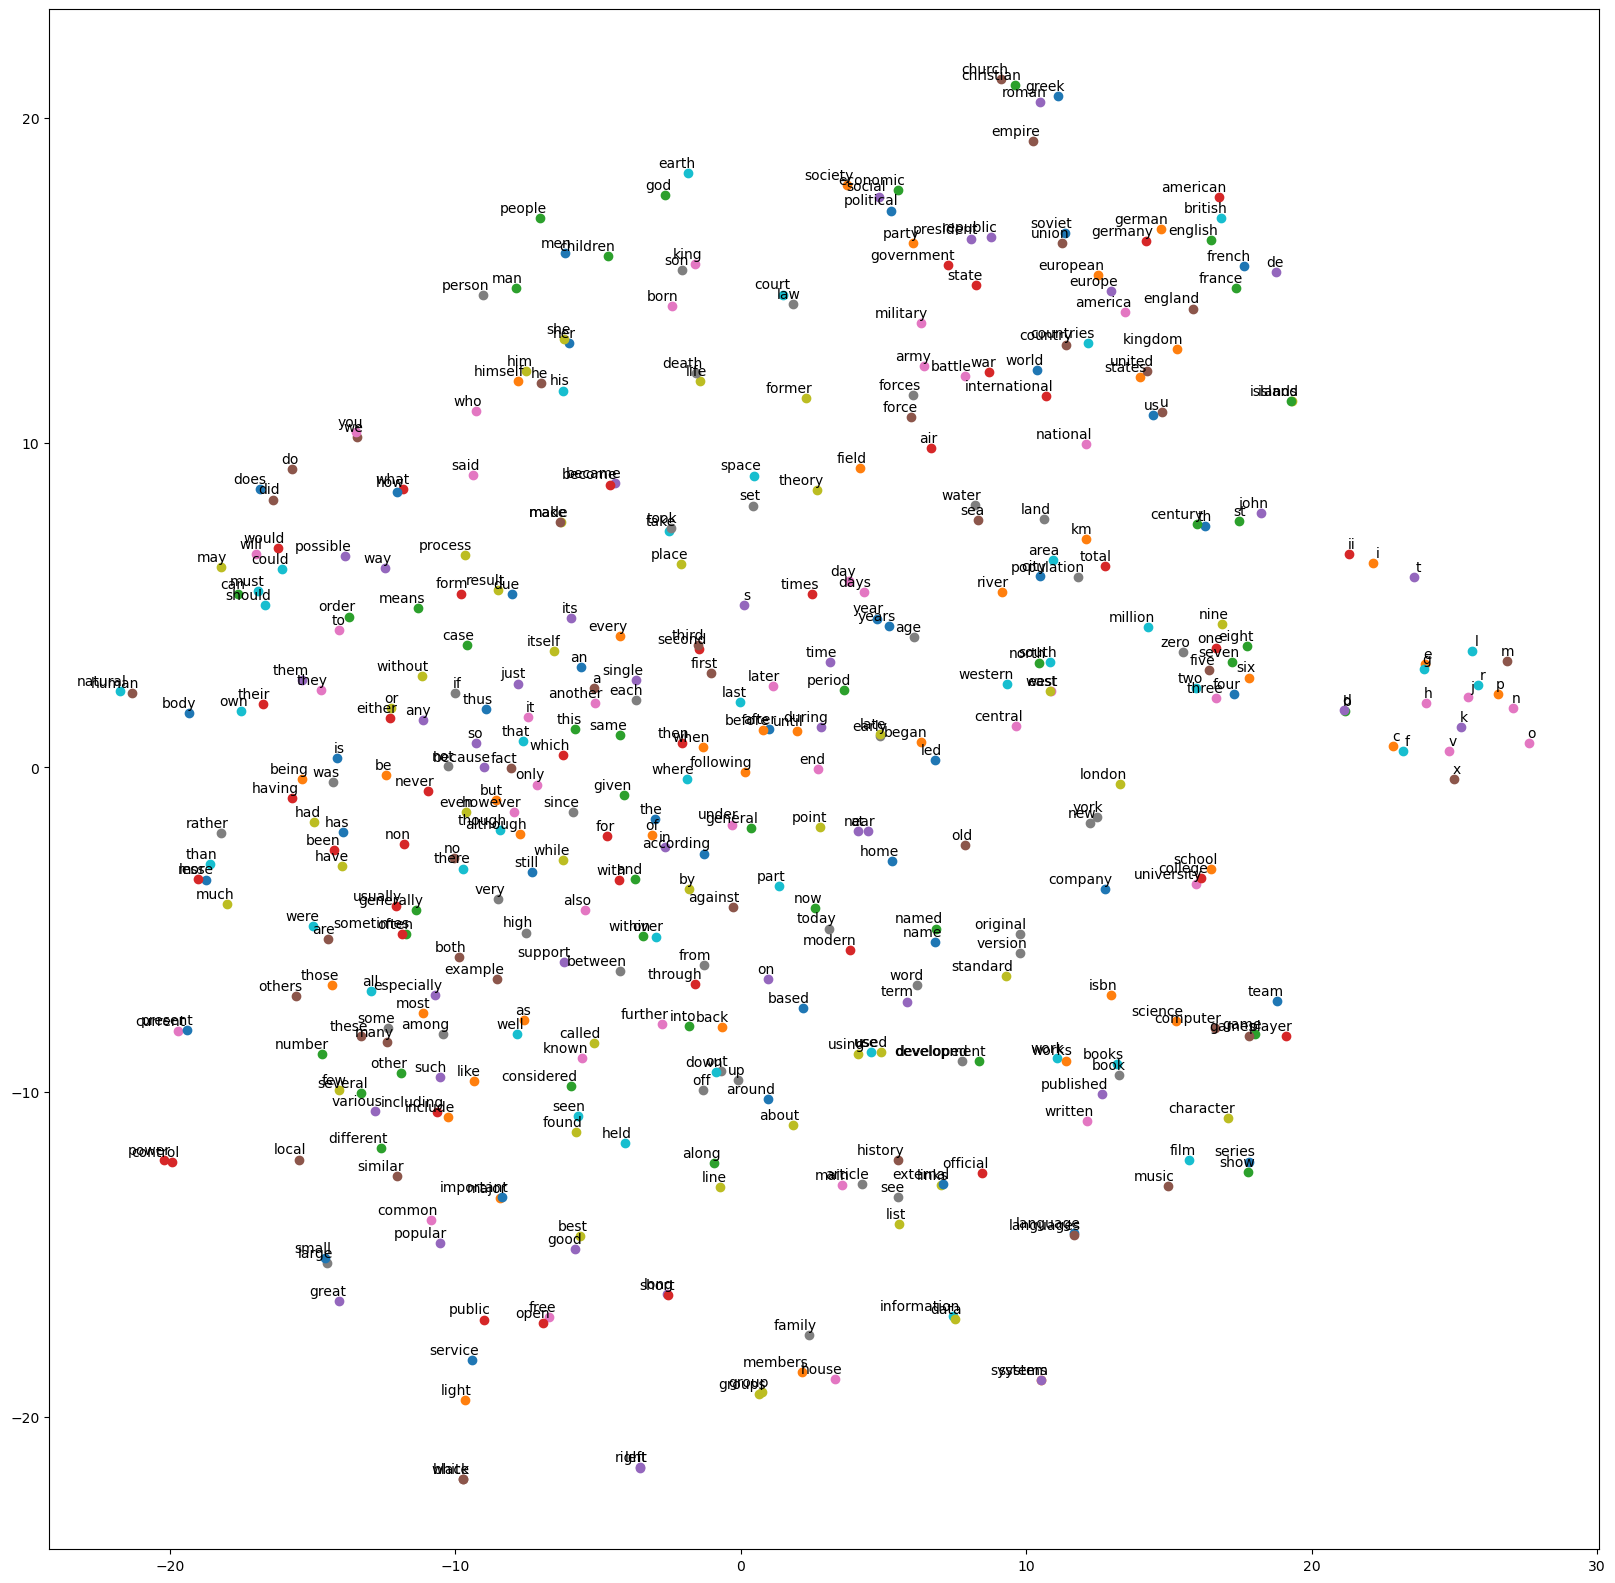

In [33]:
from matplotlib import pylab
%matplotlib inline

def plot(embeddings, labels):
    pylab.figure(figsize=(20, 20))
    for i, label in enumerate(labels):
        x, y = embeddings[i, :]
        pylab.scatter(x, y)
        pylab.annotate(
            label, xy=(x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom"
        )
    pylab.show()


plot(two_d_embeddings, labels)

t-SNE and Word2Vec are stochastic. When you look at the plot, you should see clusters of similar words.

### Stopping and closing the endpoint (*Optional*)
Finally, you should delete the endpoint.

In [34]:
bt_endpoint.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: blazingtext-2023-11-09-12-58-29-869
INFO:sagemaker:Deleting endpoint with name: blazingtext-2023-11-09-12-58-29-869


# Congratulations!

You have completed this lab, and you can now end the lab by following the lab guide instructions.

*©2023 Amazon Web Services, Inc. or its affiliates. All rights reserved. This work may not be reproduced or redistributed, in whole or in part, without prior written permission from Amazon Web Services, Inc. Commercial copying, lending, or selling is prohibited. All trademarks are the property of their owners.*